In [47]:
import Gates as gts
import numpy as np
import MPO as MPO
import SuperMPS as SMPS
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.linalg as la

In [48]:
mpos,tim = gts.cx_pow_2k_mod_N_mpo_mpo(55,51,16,176)

copy 0.0001685619354248047


merge 0.3087301254272461
append 0.00013303756713867188
copy 0.0009059906005859375
merge 0.7651841640472412
append 0.00013065338134765625
copy 0.0009694099426269531
merge 0.9182038307189941
append 0.0006029605865478516
copy 0.00036644935607910156
merge 0.9458904266357422
append 0.0001404285430908203
copy 0.001071929931640625
merge 1.0440330505371094
append 0.00012993812561035156
copy 0.0011324882507324219
merge 0.9512448310852051
append 0.00012946128845214844
copy 0.001215219497680664
merge 0.9459109306335449
append 0.00012993812561035156
copy 0.0012407302856445312
merge 0.9512696266174316
append 0.00012993812561035156
copy 0.0012903213500976562
merge 0.9452898502349854
append 0.0001289844512939453
copy 0.0013346672058105469
merge 0.9443497657775879
append 0.0001277923583984375
copy 0.0016207695007324219
merge 0.7211785316467285
append 0.0001354217529296875
copy 0.001435995101928711
merge 0.560117244720459
append 0.00013136863708496094
copy 0.0015103816986083984
merge 0.5476639270782471

In [49]:
for i in range(len(mpos)):
    print("i = ",i,"\n \n \n")

    #ten = mpos[i].get_contracted_tensor_in_readable_form()
    #print(np.matmul(ten,ten.T.conj()))

    xi_thrown_away = mpos[i].xi_thrown_away
    for j in range(len(xi_thrown_away)):
        print(xi_thrown_away[j])


i =  0 
 
 

xi_away: [array([0., 0.]), array([2.44928983e-15, 9.41215905e-16, 8.71712127e-16]), array([1.06445823e-15, 6.48826684e-17, 4.11618333e-17, 1.07025753e-17]), array([3.83525404e-15, 8.72620730e-16, 7.52392172e-16, 7.52392172e-16,
       7.52392172e-16, 7.52392172e-16, 7.52392172e-16, 7.52392172e-16,
       7.52392172e-16, 7.52392172e-16, 7.52392172e-16, 7.52392172e-16,
       7.52392172e-16, 7.52392172e-16, 7.52392172e-16, 7.52392172e-16,
       7.52392172e-16, 7.52392172e-16, 7.52392172e-16, 7.52392172e-16,
       7.52392172e-16, 7.52392172e-16, 7.52392172e-16, 7.52392172e-16,
       7.52392172e-16, 7.52392172e-16, 7.52392172e-16, 7.52392172e-16,
       7.52392172e-16, 7.52392172e-16, 7.52392172e-16, 7.52392172e-16,
       7.52392172e-16, 7.52392172e-16, 7.52392172e-16, 7.52392172e-16,
       7.52392172e-16, 7.52392172e-16, 7.52392172e-16, 7.52392172e-16,
       7.05116217e-16, 5.98190506e-16, 2.65116272e-16])] function: initializing norm: 11.313708498984761
i =  1 
 
 

xi

In [50]:
def get_total_at_every_stage(mpo):
    total = []
    xi_thrown_away = mpo.xi_thrown_away
    stage = []
    for xi in xi_thrown_away[0].xi:
        stage.append(np.sum(np.power(xi,2)))
    total.append(stage)
    for i in range(1,len(xi_thrown_away),2):
        stage = []
        for xi in xi_thrown_away[i].xi:
            sum = np.sum(np.power(xi,2))
            stage.append(sum)
            if sum > 10**(-18):
                print("i = ",i," sum = ",sum)
                #print(xi)
        for xi in xi_thrown_away[i+1].xi:
            stage.append(np.sum(np.power(xi,2)))
        total.append(stage)

    return total

get_total_at_every_stage(mpos[-1])
            
        


i =  1  sum =  0.009209590792095235
i =  5  sum =  0.000958901947442524
i =  7  sum =  0.0025004786802121886
i =  9  sum =  0.023013318483517453
i =  11  sum =  0.007516208631931185
i =  13  sum =  0.04031643462610961
i =  15  sum =  0.00032415956375945315
i =  17  sum =  4.112414886731843e-09
i =  19  sum =  9.90377587886746e-16
i =  19  sum =  1.703869862022253e-17
i =  21  sum =  2.525835193106586e-16
i =  21  sum =  6.92623764584445e-17
i =  23  sum =  3.586353331050362e-17
i =  23  sum =  9.131730729155427e-18


[[0.0, 7.644790101036189e-30, 1.139089930708594e-30, 3.7907519172612635e-29],
 [0.009209590792095235,
  6.1830920773172545e-28,
  0.0,
  2.1042502874342117e-28,
  3.33179102399151e-27,
  3.1182869307691735e-27],
 [6.283881501702979e-28,
  0.0,
  1.503608653662024e-28,
  9.273834308611152e-28,
  3.0576940784923285e-29],
 [0.000958901947442524,
  0.0,
  3.7384047623558517e-29,
  7.433456668802913e-28,
  1.5000114726757296e-29],
 [0.0025004786802121886,
  0.0,
  4.020002189731486e-29,
  3.9726418725876177e-28,
  1.4980446386570365e-28],
 [0.023013318483517453,
  0.0,
  7.684799375885639e-29,
  3.946369756998187e-27,
  1.1547690699126373e-27],
 [0.007516208631931185,
  0.0,
  1.0503952944021421e-29,
  2.0320251956866465e-27,
  5.028274597766858e-27],
 [0.04031643462610961,
  0.0,
  4.257925157536211e-30,
  2.460560135746821e-28,
  1.0739037491048771e-26],
 [0.00032415956375945315,
  0.0,
  8.530019143949397e-33,
  2.2485578067036338e-31,
  3.801885167396536e-29],
 [4.112414886731843e-09,
 

In [51]:
mpo1 = mpos[6]
L= mpo1.L
s = mpo1.get_schmidt_values(L//2,'r')
print(s)
print(len(s))
print(la.norm(s))

[7.83747049e+00 4.17159430e+00 2.46228569e+00 2.21050426e+00
 2.19749734e+00 1.90264547e+00 1.79233190e+00 1.53358369e+00
 1.44336884e+00 1.43593113e+00 1.43476214e+00 1.35896422e+00
 1.33809913e+00 1.32117834e+00 1.22415193e+00 1.18239315e+00
 1.01963678e+00 9.86359356e-01 9.32956867e-01 8.78080968e-01
 8.33526313e-01 8.19346896e-01 7.84051914e-01 7.76534291e-01
 7.63523171e-01 6.28325989e-01 6.01760817e-01 5.63268336e-01
 4.99901834e-01 4.92310969e-01 4.68538047e-01 4.24176671e-01
 4.03494382e-01 4.00559892e-01 3.21511598e-01 3.14847850e-01
 3.07544800e-01 2.63469462e-01 2.40668701e-01 2.14536582e-01
 1.82941703e-01 1.81232024e-01 1.40563152e-01 1.21023400e-01
 1.02394733e-01 8.58779155e-02 8.49726558e-02 6.35864500e-02
 6.27091821e-02 5.98027592e-02 5.09868981e-02 4.26450447e-02
 3.11716288e-02 2.85719817e-02 2.63184248e-02 2.23161318e-02
 1.86921012e-02 1.62747044e-02 1.27007216e-02 1.14393035e-02
 5.93683328e-03 5.29935592e-03]
62
11.313708498984761


In [52]:
matrices = []
for i in range(len(mpos)):
    matrix = mpos[i].get_contracted_tensor_in_readable_form()
    matrix = np.matmul(matrix,matrix.T.conj())
    print("i = ",i,"\n",np.diag(matrix))
    matrix = np.abs(matrix)
    matrices.append(matrix)

i =  0 
 [1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j
 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j
 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j
 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j
 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j
 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j
 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j
 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j
 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j
 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j
 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j
 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j
 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j]
i =  1 
 [1.0011722 +0.j 0.99974955+0.j 1.00146308+0.j 1.00146309+0.j
 1.00146308

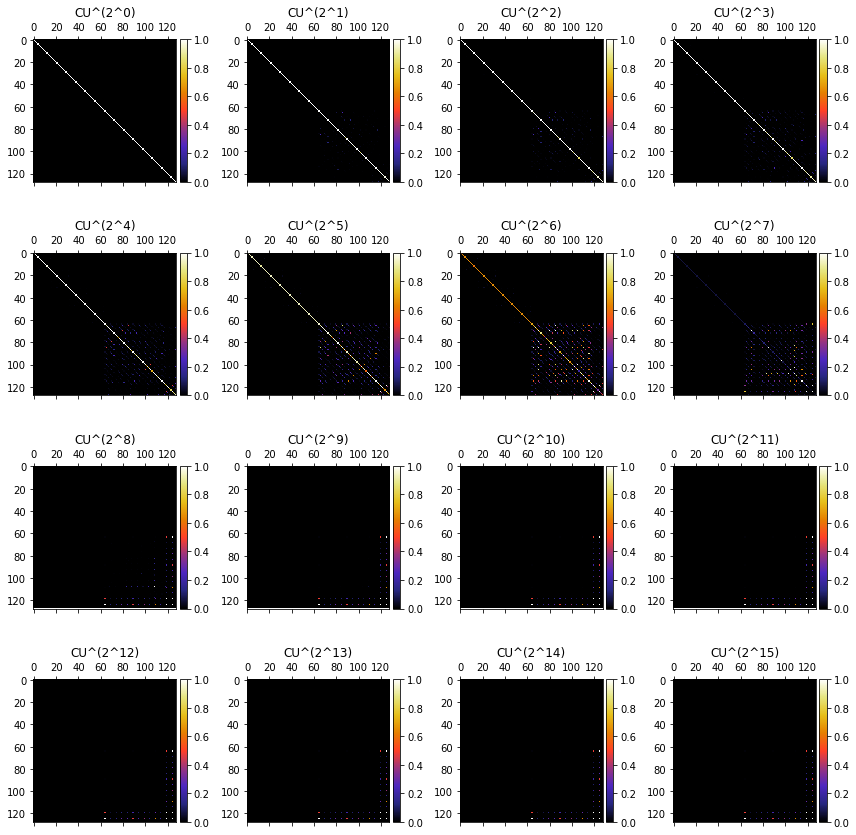

In [53]:


# Number of matrices
num_matrices = len(matrices)

# Calculate the number of rows and columns for subplots
num_rows = int(np.ceil(np.sqrt(num_matrices)))
num_cols = int(np.ceil(num_matrices / num_rows))

# Create the figure and axes for subplots with adjusted sizes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12,12))



# Loop through the matrices and plot them in subplots
for i, matrix in enumerate(matrices):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    im = ax.matshow(matrix, cmap='CMRmap',vmax=1,vmin=0)
    ax.set_title(f"CU^(2^{i})")

    # Add colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(im, cax=cax)

# Remove empty subplots if necessary
if num_matrices < num_rows * num_cols:
    if num_rows > 1:
        for i in range(num_matrices, num_rows * num_cols):
            fig.delaxes(axes[i // num_cols, i % num_cols])
    else:
        for i in range(num_matrices, num_rows * num_cols):
            fig.delaxes(axes[i])

# Adjust the spacing between subplots
fig.tight_layout()

# Display the figure
plt.savefig("unitary_cu_mpo.pdf")
plt.show()



<Figure size 1080x1080 with 0 Axes>

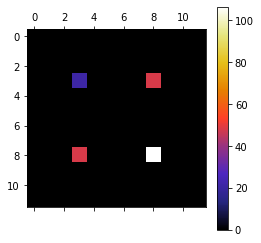

In [54]:
last_matrix = matrices[-2]
plt.figure(figsize=(15,15))
plt.matshow(last_matrix[127-11:,127-11:],cmap='CMRmap')
plt.colorbar()
plt.savefig("unitary_cu_last.pdf")